# Cruise 1 section

In [2]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import gsw
from seabird.cnv import fCNV

In [3]:

# read each seabird cast from your directory
data_dir = 'CNV_Cruise_1'

cast4 = fCNV(data_dir+'/Station 4_TSwift_loop_filter_teos10_bin.cnv')
cast5 = fCNV(data_dir+'/Station 5_loop_filter_teos10_bin.cnv')
castWF = fCNV(data_dir+'/Station WF_loop_filter_teos10_bin.cnv')
castRace = fCNV(data_dir+'/TheRace_loop_filter_teos10_bin.cnv')


# Station 4

In [4]:

# convert the data one station at a time to xarray
# ideally would make this more generic - but for now, it works!
# get data from cnv file
depth    = cast4['DEPTH']
temperature = cast4['TEMP']
salinity    = cast4['PSAL']
fluorescence = cast4['wetStar']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity, 'fluorescence' : fluorescence}

# convert the dictionary to a pandas dataframe
cast4df=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
cast4xr = cast4df.set_index('depth').to_xarray()

# add latitude and longitude coordinates
cast4xr = cast4xr.assign_coords({'latitude': xr.DataArray(cast4.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(cast4.attributes['LONGITUDE']),
                                 'station':4
                                  }
                                  )   
# cast6xr

# Station 5 

In [5]:

# convert the data one station at a time to xarray
# ideally would make this more generic - but for now, it works!
# get data from cnv file
depth    = cast5['DEPTH']
temperature = cast5['TEMP']
salinity    = cast5['PSAL']
fluorescence = cast5['wetStar']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity, 'fluorescence' : fluorescence}

# convert the dictionary to a pandas dataframe
cast5df=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
cast5xr = cast5df.set_index('depth').to_xarray()

# add latitude and longitude coordinates
cast5xr = cast5xr.assign_coords({'latitude': xr.DataArray(cast5.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(cast5.attributes['LONGITUDE']),
                                 'station':5
                                  }
                                  )   
# cast4xr

# Station WF

In [8]:

# convert the data one station at a time to xarray
# ideally would make this more generic - but for now, it works!
# get data from cnv file
depth    = castWF['DEPTH']
temperature = castWF['TEMP']
salinity    = castWF['PSAL']
fluorescence = castWF['wetStar']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity, 'fluorescence' : fluorescence}

# convert the dictionary to a pandas dataframe
castWFdf=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
castWFxr = castWFdf.set_index('depth').to_xarray()

# add latitude and longitude coordinates
castWFxr = castWFxr.assign_coords({'latitude': xr.DataArray(castWF.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(castWF.attributes['LONGITUDE']),
                                 'station':"WF"
                                  }
                                  )   
# castWFxr

# Station Race 

In [9]:

# convert the data one station at a time to xarray
# ideally would make this more generic - but for now, it works!
# get data from cnv file
depth    = castRace['DEPTH']
temperature = castRace['TEMP']
salinity    = castRace['PSAL']
fluorescence = castRace['wetStar']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity, 'fluorescence' : fluorescence}

# convert the dictionary to a pandas dataframe
castRacedf=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
castRacexr = castRacedf.set_index('depth').to_xarray()

# add latitude and longitude coordinates
castRacexr = castRacexr.assign_coords({'latitude': xr.DataArray(castRace.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(castRace.attributes['LONGITUDE']),
                                 'station':"Race"
                                  }
                                  )   
# castRacexr

In [10]:
# combine all the casts into one xarray dataset
ctdsection = xr.concat([cast4xr,cast5xr,castWFxr, castRacexr],"cast")
#ctdsection

In [21]:
# calculate distance
d = gsw.distance(ctdsection.longitude.values,ctdsection.latitude.values)/1e3 # km
dist = np.cumsum(np.hstack([0,d]))

# add distance coordinate
ctdsection = ctdsection.assign_coords({'distance' : xr.DataArray(dist, coords=[ctdsection.station], dims='cast')})

ctdsection.distance.attrs['units'] = 'km'
ctdsection

<xarray.Dataset>
Dimensions:       (cast: 4, depth: 159)
Coordinates:
  * depth         (depth) float64 1.5 2.0 2.5 3.0 3.5 ... 80.0 80.5 81.0 81.5
    latitude      (cast) float64 41.3 41.14 41.05 41.25
    longitude     (cast) float64 -71.84 -71.65 -71.47 -72.09
    station       (cast) object 4 5 'WF' 'Race'
  * cast          (cast) object 4 5 'WF' 'Race'
    distance      (cast) float64 0.0 23.7 41.86 98.62
Data variables:
    temperature   (cast, depth) float64 nan nan 0.9262 nan ... 19.15 19.15 19.15
    salinity      (cast, depth) float64 nan nan 1.558 nan ... 31.71 31.71 31.71
    fluorescence  (cast, depth) float64 nan nan 0.0908 nan ... 1.152 1.097 1.164

In [12]:
# add units for others
ctdsection.depth.attrs['units'] = 'm'
ctdsection.temperature.attrs['units'] = 'degree C'
ctdsection.salinity.attrs['units'] = 'psu'

# PLotting sections

Text(0.5, 1.0, 'Temperature Section')

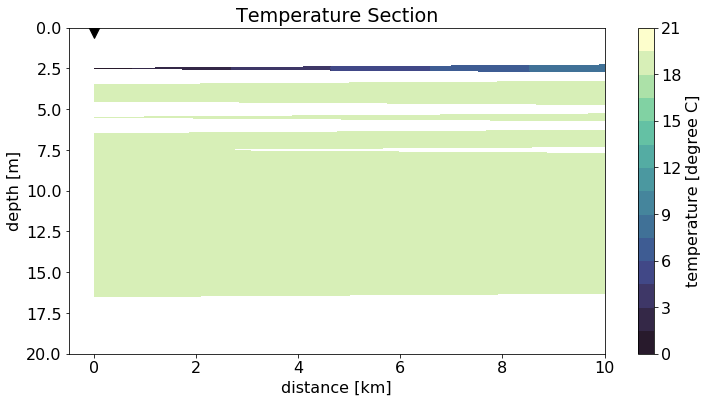

In [19]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(20,0)
    ax.set_xlim(-.5,10)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.temperature.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Temperature Section")

# plt.savefig('Figures/temperaturesection789.png')

Text(0.5, 1.0, 'Salinity Section')

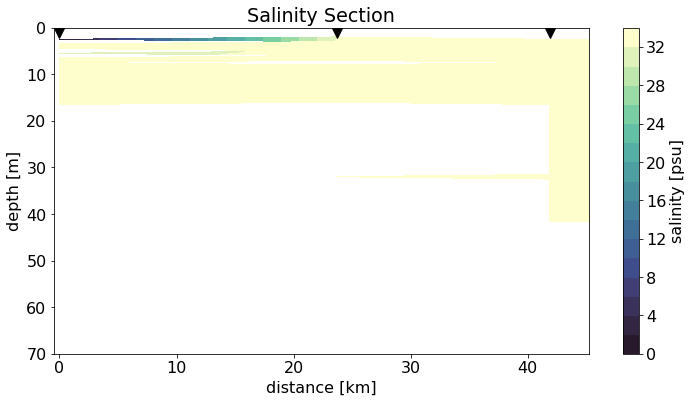

In [20]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(40,0)
    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.salinity.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Salinity Section")

#plt.savefig('Figures/salinitysection789.png')